# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [250]:
data = pd.read_csv(r'marketing.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [251]:
data.shape

(2240, 27)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [253]:
data.isnull().sum()/len(data)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

- Here, only income column seems to have missing values. It is around 1.07%. We will impute Income with most occured values in the column

In [254]:
def impute_most_occur(data):
    data=data.copy(deep=True)
    temp_income=data['Income'].value_counts().index[0]
    data['Income'].fillna(value=temp_income,inplace=True)
    return data

data=impute_most_occur(data)

In [255]:
#Checking missing values again

data.isnull().sum()/len(data)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [256]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [257]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


- There are no duplicate records in the dataset.

### 5. Drop the columns which you think redundant for the analysis 

In [258]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [259]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [260]:
data['AcceptedCmp3'].unique()

array([0, 1])

In [261]:
data['AcceptedCmp4'].unique()

array([0, 1])

In [262]:
data['AcceptedCmp5'].unique()

array([0, 1])

In [263]:
data['AcceptedCmp1'].unique()

array([0, 1])

In [264]:
data['AcceptedCmp2'].unique()

array([0, 1])

In [265]:
data['Response'].unique()

array([1, 0])

In [266]:
data['Complain'].unique()

array([0, 1])

In [267]:
data_df=data.drop(['ID','Dt_Customer'],axis=1)
data_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [268]:
data_df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [269]:
data_df['Marital_Status']=data_df['Marital_Status'].replace(['Together', 'Married'] , 'relationship')

In [270]:
data_df['Marital_Status'].unique()

array(['Single', 'relationship', 'Divorced', 'Widow', 'Alone', 'Absurd',
       'YOLO'], dtype=object)

In [271]:
data_df['Marital_Status']=data_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'] , 'Single')

In [272]:
data_df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [273]:
column_series = pd.Series (data_df.columns)

In [274]:
req_columns = column_series [column_series.str.contains ('Mnt')].values.tolist()

In [275]:
data_df['Total_Expenses'] = data_df[req_columns].sum(axis=1)

In [276]:
data_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses'],
      dtype='object')

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [277]:
data_df['Num_Total_Purchases'] = data_df['NumWebPurchases'] + data_df[ 'NumCatalogPurchases'] + data_df['NumStorePurchases'] + data_df['NumDealsPurchases']

In [278]:
data_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases'],
      dtype='object')

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [279]:
data_df['Kids'] = data_df['Kidhome'] + data_df['Teenhome']
data_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases',
       'Kids'],
      dtype='object')

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [280]:
data_df['TotalAcceptedCmp'] = data_df['AcceptedCmp1'] + data_df['AcceptedCmp2']+ data_df['AcceptedCmp3']+ data_df['AcceptedCmp4']+ data_df['AcceptedCmp5']+ data_df['Response']
data_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp'],
      dtype='object')

### 11. Drop those columns which we have used above for obtaining new features

In [281]:
column_series = pd.Series(data_df.columns)

In [282]:
req_columns = column_series [column_series.str.contains ('Mnt')].values.tolist()

In [283]:
data_df=data_df.drop(req_columns,axis=1)
data_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,58,3,8,10,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,1,1,38,2,1,1,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,0,0,26,1,8,2,...,0,0,0,0,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,1,0,26,2,2,0,...,0,0,0,0,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,1,0,94,5,5,3,...,0,0,0,0,0,0,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,relationship,61223.0,0,1,46,2,9,3,...,0,0,0,0,0,0,1341,18,1,0
2236,1946,PhD,relationship,64014.0,2,1,56,7,8,2,...,0,0,1,0,0,0,444,22,3,1
2237,1981,Graduation,Single,56981.0,0,0,91,1,2,3,...,1,0,0,0,0,0,1241,19,0,1
2238,1956,Master,relationship,69245.0,0,1,8,2,6,5,...,0,0,0,0,0,0,843,23,1,0


In [284]:
column_series = pd.Series(data_df.columns)

In [285]:
req_columns = column_series [column_series.str.contains ('home')].values.tolist()

In [286]:
data_df=data_df.drop(req_columns,axis=1)
data_df

,Year_Birth,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,3,8,10,4,7,...,0,0,0,0,0,1,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,2,1,1,2,5,...,0,0,0,0,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,1,8,2,10,4,...,0,0,0,0,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,2,2,0,4,6,...,0,0,0,0,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,5,3,6,5,...,0,0,0,0,0,0,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,relationship,61223.0,46,2,9,3,4,5,...,0,0,0,0,0,0,1341,18,1,0
2236,1946,PhD,relationship,64014.0,56,7,8,2,5,7,...,0,0,1,0,0,0,444,22,3,1
2237,1981,Graduation,Single,56981.0,91,1,2,3,13,6,...,1,0,0,0,0,0,1241,19,0,1
2238,1956,Master,relationship,69245.0,8,2,6,5,10,3,...,0,0,0,0,0,0,843,23,1,0


In [287]:
data_df.drop(['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1,inplace=True)
data_df

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,relationship,61223.0,46,5,0,1341,18,1,0
2236,1946,PhD,relationship,64014.0,56,7,0,444,22,3,1
2237,1981,Graduation,Single,56981.0,91,6,0,1241,19,0,1
2238,1956,Master,relationship,69245.0,8,3,0,843,23,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [288]:
import datetime

In [290]:
from datetime import date

def age(data_df):
    data_df=data_df.copy(deep=True)
    birthyear=data_df['Year_Birth']
    today = date.today()
    age = today.year - birthyear
    return age

data_df['Age']=age(data_df)

In [291]:
data_df.drop(['Year_Birth'],axis=1,inplace=True)
data_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,relationship,61223.0,46,5,0,1341,18,1,0,56
2236,PhD,relationship,64014.0,56,7,0,444,22,3,1,77
2237,Graduation,Single,56981.0,91,6,0,1241,19,0,1,42
2238,Master,relationship,69245.0,8,3,0,843,23,1,0,67


In [292]:
data_df_cleaned=data_df.copy()

### 13. Encode the categorical variables in the dataset

In [293]:
from sklearn.preprocessing import LabelEncoder

In [294]:
## Label Encoding

category=['Education','Marital_Status']
lbl_encode = LabelEncoder( )
for i in category:
    data_df[i]=data_df[[i]].apply(lbl_encode.fit_transform)

In [295]:
data_df.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,66
1,2,0,46344.0,38,5,0,27,6,2,0,69
2,2,1,71613.0,26,4,0,776,21,0,0,58
3,2,1,26646.0,26,6,0,53,8,1,0,39
4,4,1,58293.0,94,5,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
data_df1= data_df.copy()
scaled_features = StandardScaler().fit_transform(data_df1.values)
scaled_features_df1 = pd.DataFrame(scaled_features, index=data_df1.index, columns=data_df1.columns)

In [298]:
scaled_features_df1.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.250276,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.213095,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.779692,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-0.987004,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.256366,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [299]:
# Calculating covariance matrix
covariance_matrix = np.cov(scaled_features_df1.T)
print('Covariance matrix','\n',covariance_matrix)

Covariance matrix 
 [[ 1.00044663 -0.01375403  0.11835904 -0.01173369 -0.04029882 -0.05056252
   0.09209518  0.09405439  0.05321304  0.06327892  0.17146685]
 [-0.01375403  1.00044663  0.0069758  -0.00450972  0.00344176 -0.00520466
  -0.01775232  0.00671037  0.03917598 -0.06004206 -0.0042384 ]
 [ 0.11835904  0.0069758   1.00044663 -0.00969626 -0.53917303 -0.02495218
   0.6577104   0.55857701 -0.29354812  0.28571634  0.156235  ]
 [-0.01173369 -0.00450972 -0.00969626  1.00044663 -0.02145427  0.01323699
   0.02044173  0.00574294  0.01806145 -0.08900203  0.01987996]
 [-0.04029882  0.00344176 -0.53917303 -0.02145427  1.00044663  0.01977734
  -0.50044131 -0.31242795  0.41860616 -0.12836726 -0.12119336]
 [-0.05056252 -0.00520466 -0.02495218  0.01323699  0.01977734  1.00044663
  -0.03707503 -0.02059185  0.03108014 -0.01761676  0.030141  ]
 [ 0.09209518 -0.01775232  0.6577104   0.02044173 -0.50044131 -0.03707503
   1.00044663  0.75423984 -0.49911047  0.4564099   0.11135611]
 [ 0.09405439  0.0067

In [300]:
# Calculating eigen values and eigen vectors
eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)
print('Eigen vectors:','\n',eigen_vecs)
print('\n')
print('Eigen values:','\n',eigen_vals)

Eigen vectors: 
 [[-8.09150474e-02  1.32806946e-02  2.32640580e-02  5.53795301e-01
   9.49560794e-02 -1.08551858e-01 -6.91384532e-01 -2.11769090e-01
   3.50140899e-01  1.35055599e-01  3.93494704e-02]
 [ 1.62507507e-02  3.59737062e-04  4.92970003e-03  7.23960215e-02
   1.22249429e-02  1.62155885e-01 -9.76354200e-02 -2.48818024e-01
  -2.94899552e-01 -5.08062346e-01  7.42623821e-01]
 [-4.51563721e-01  9.89923667e-02 -7.32425697e-01  1.07661655e-01
  -4.07092346e-01 -2.38760395e-01  3.33350342e-02  8.13115879e-02
  -6.75968831e-02 -3.97089953e-02  4.06526394e-02]
 [ 6.13104644e-03  3.79591192e-02 -2.50430278e-02  1.09923062e-01
  -5.29169327e-02  1.35425766e-01 -2.74193302e-02 -4.74562083e-01
  -6.57621469e-01  5.46100730e-01 -8.95429968e-02]
 [ 3.77991840e-01 -1.05866975e-01 -5.22104731e-01  3.96525207e-02
   4.47681018e-01 -8.69696321e-02  2.93768842e-01 -4.58367047e-01
   2.46770979e-01 -5.91980701e-02 -5.44596955e-02]
 [ 2.87568023e-02 -6.40176663e-03 -2.62953695e-05  2.18677715e-02
  

In [301]:
# Calculating the Variance explained and the cummulative variance explained
total = sum(eigen_vals)
variance_exp = [ (i/total)*100  for i in sorted(eigen_vals,reverse=True)]
cum_variance_exp = np.cumsum(variance_exp)
print('Variance Explained: ',variance_exp)
print('Cummulative Variance Explained: ',cum_variance_exp)

Variance Explained:  [28.90611843429594, 11.41714740075103, 9.76868159649281, 9.240739608854879, 9.07404337753612, 8.019117872320322, 7.403860249089536, 6.3724512627498715, 5.198863669420538, 3.1500233800165893, 1.4489531484723586]
Cummulative Variance Explained:  [ 28.90611843  40.32326584  50.09194743  59.33268704  68.40673042
  76.42584829  83.82970854  90.2021598   95.40102347  98.55104685
 100.        ]


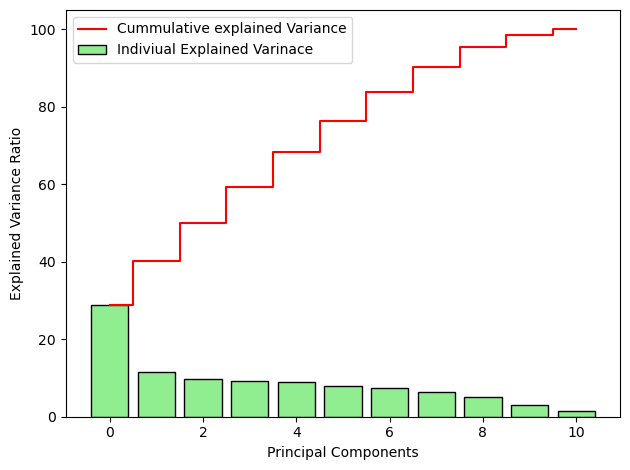

In [302]:
# Screen plot

plt.bar(range(11),variance_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(11), cum_variance_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

- As 90-95% of variance in data is explained by first 8 variables, the number of PCA components to be used is 8.

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [303]:
# Fitting the PCA model
pca=PCA(n_components = 8)
pca.fit(scaled_features_df1)

PCA(n_components=8)

In [304]:
data_pca = pca.transform(scaled_features_df1)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.966594,-0.070294,-0.336034,1.204005,-0.689000,-0.293438,-1.150485,-0.340502
1,-1.507048,0.996381,-0.368806,1.011662,-0.420997,1.371837,-0.726433,-0.338496
2,1.318613,-0.297203,0.296976,-0.775898,0.724078,0.984784,0.021719,0.064259
3,-1.735736,-1.137093,-0.258745,-0.833181,0.573384,0.220414,0.563103,0.237277
4,0.067956,0.568410,0.903858,-0.749828,-0.809369,-1.232951,1.328090,0.904008


In [305]:
# Applying K-Means clustering 

cluster_range = range(2,20)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,2,16847.100233
1,3,14640.306370
2,4,13249.514203
3,5,12140.691285
4,6,11216.530588
5,7,10571.076387
6,8,10014.495155
7,9,9617.270249
8,10,9208.682821
9,11,8907.977611


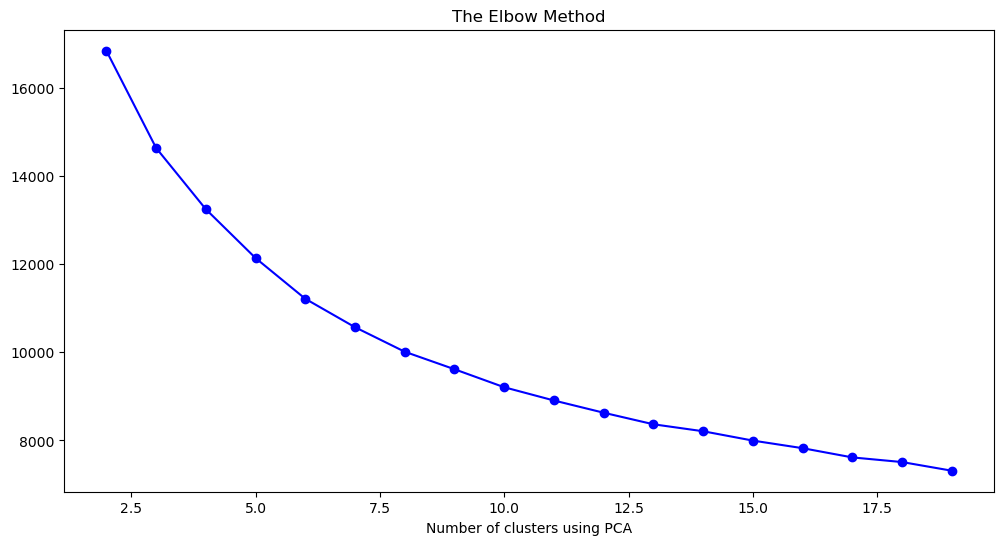

In [306]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the Elbow plot, we can see that at K=3, the kink appears after which the graph is much smmoother. So we will do it using 4 clusters.
- The clusters are labeled as 0,1,2

In [307]:
# Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=15, random_state=1000)
kmeans.fit(data_pca)

KMeans(n_clusters=3, n_init=15, random_state=1000)

In [308]:
# Obtaining labels
kmeans.labels_

array([0, 2, 0, ..., 0, 1, 1], dtype=int32)

In [309]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,0
1,2
2,0
3,2
4,1


In [310]:
# Joining label dataframe with the pca_df dataframe
kmeans_df = data_pca.join(df_labels)
kmeans_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,1.966594,-0.070294,-0.336034,1.204005,-0.689000,-0.293438,-1.150485,-0.340502,0
1,-1.507048,0.996381,-0.368806,1.011662,-0.420997,1.371837,-0.726433,-0.338496,2
2,1.318613,-0.297203,0.296976,-0.775898,0.724078,0.984784,0.021719,0.064259,0
3,-1.735736,-1.137093,-0.258745,-0.833181,0.573384,0.220414,0.563103,0.237277,2
4,0.067956,0.568410,0.903858,-0.749828,-0.809369,-1.232951,1.328090,0.904008,1


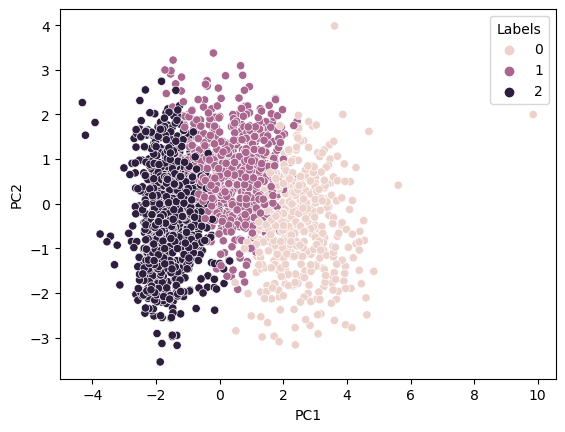

In [311]:
# Visualising the clusters formed
sns.scatterplot(kmeans_df['PC1'], kmeans_df['PC2'], hue='Labels', data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

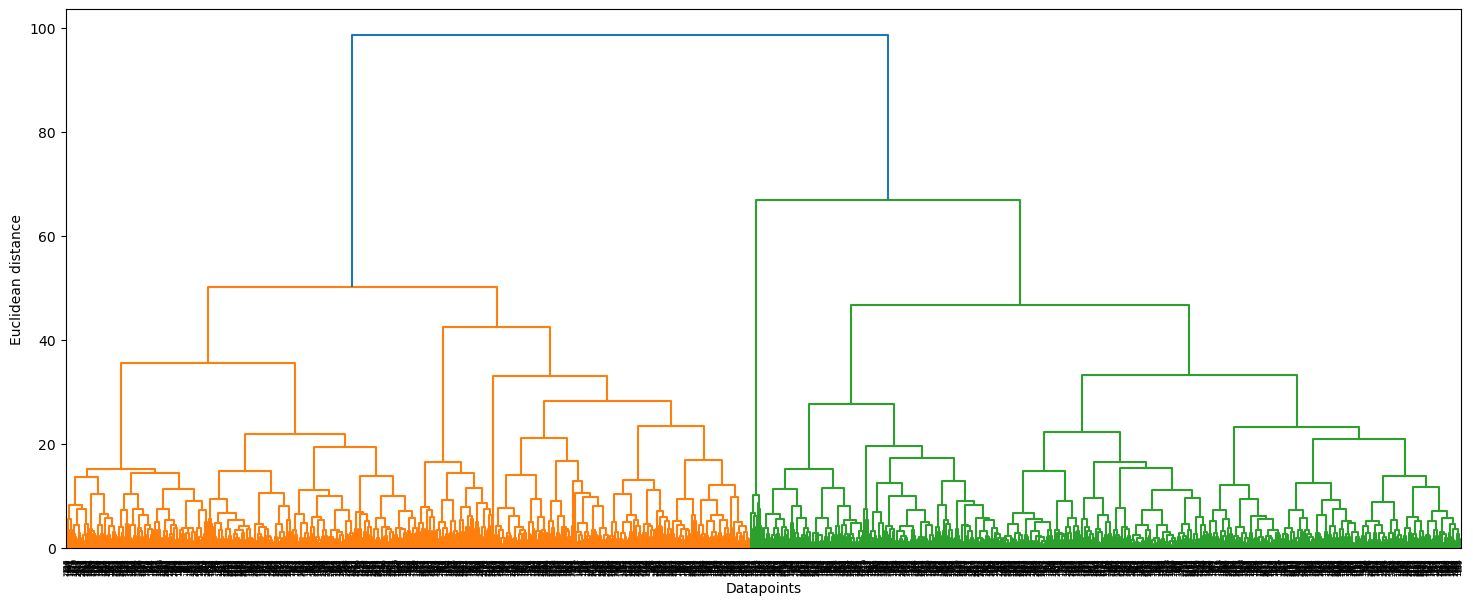

In [312]:
plt.figure(figsize=[18,7])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [327]:
# Computing silhouette score

kmeans_score = []

for i in range(2,20):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features)
    labels = hier.fit_predict(scaled_features)
    print(i,silhouette_score(scaled_features,labels))

2 0.19681555161766565
3 0.20612542736696052
4 0.1399453129591897
5 0.12145507818546107
6 0.12873036969448126
7 0.12757144373111318
8 0.10450425234052312
9 0.1058889903035141
10 0.10994200109954276
11 0.11180333806881827
12 0.11059689353863626
13 0.10328076553394
14 0.09815462267743903
15 0.09407035013144376
16 0.09311326815492642
17 0.093918631203076
18 0.09752408176710047
19 0.09901943705713794


- From above, we can observe that for 3 clusters the silhoutte score is highest, we can choose optimal clusters as 3

In [328]:
## Building hierarchical clustering model using the optimal clusters as 3

hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(data_pca)

In [329]:
## Creating a dataframe of the labels
df_labels2 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_labels2.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [330]:
# Joining the label dataframe with the initial unscaled dataframe data_df_cleaned
df_hier = data_df_cleaned.join(df_labels2)
df_hier.head(5)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,66,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,69,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,58,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,39,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,42,0


### Visualization and Interpretation of results

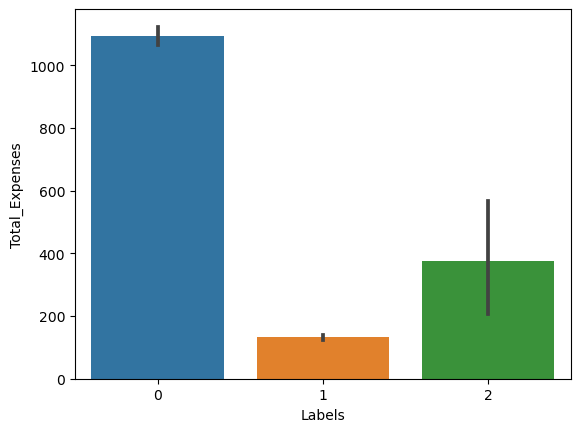

In [331]:
# Bivariate analysis using Total_Expenses

sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

-Total Expense is much higher for Cluster-0 compared to Cluster-1 and Cluster-2

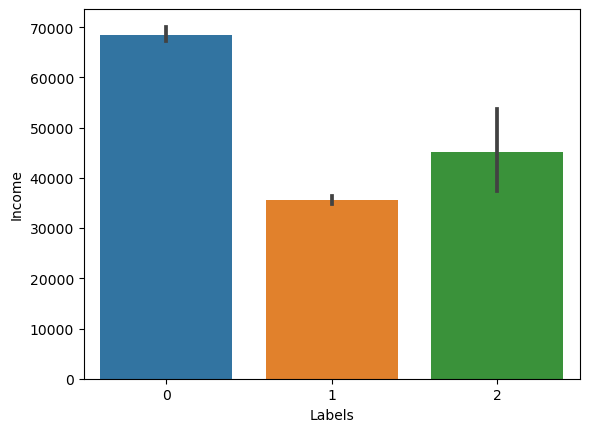

In [332]:
# Bivariate analysis using Income

sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

- Cluster-0 receives maximum income amongst Clusters 0,1 and 2

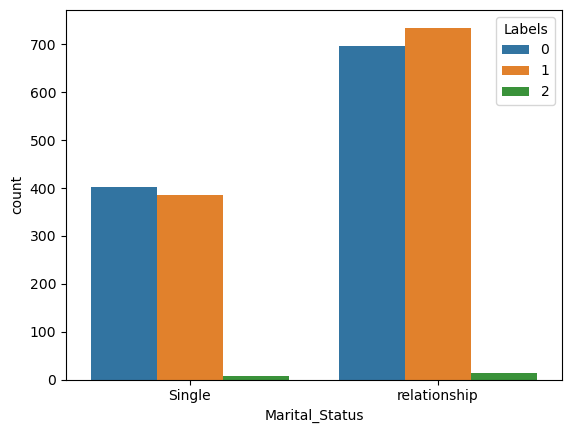

In [333]:
# Bivariate analysis using Marital Status

sns.countplot(df_hier['Marital_Status'], hue='Labels', data=df_hier)
plt.show()

- The number of single people are almost equivalent in cluster-0 and 1.
- The number of people in relationship is slightly higher in cluster 1 than in cluster 0
- Cluster-2 has lowest population, while cluster 1 has the highest

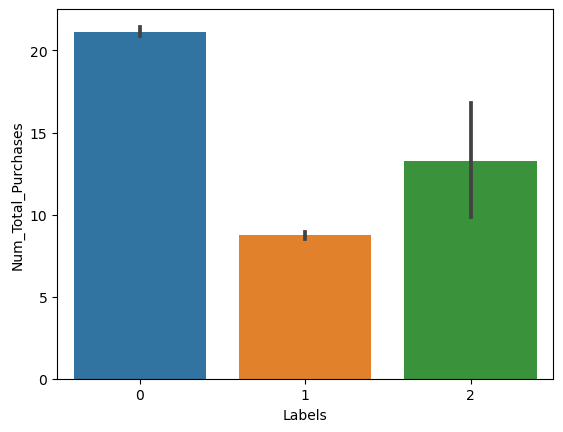

In [334]:
# Bivariate analysis using total Purchases

sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

- Total number of purchases is higher for Cluster-0 than Cluster-1 and Cluster-2

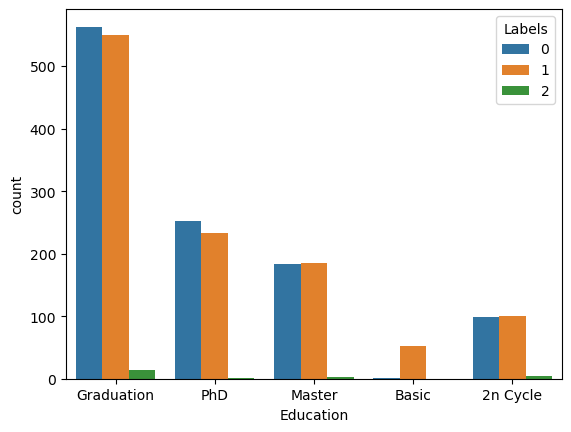

In [335]:
#Bivariate analysis using Education

sns.countplot(df_hier['Education'], hue='Labels', data=df_hier)
plt.show()

- Maximum population has guaduation level qualification
- The number of people with graduation, masters, PhD and 2n Cycle is almost same both in cluster 0 and 1
- Cluster 2 seems to have very less population, and so not much can be inferred

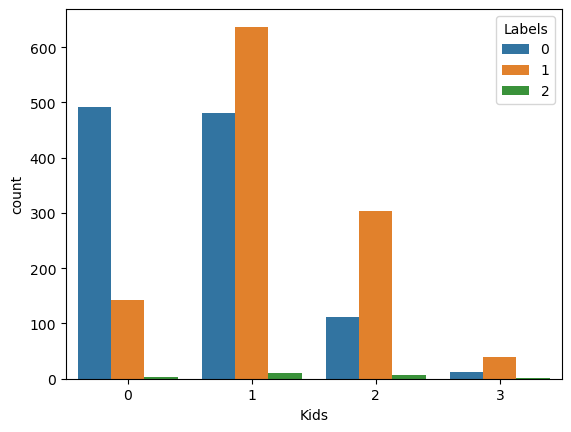

In [336]:
# Bivariate analysis using number of Kids people have

sns.countplot(df_hier['Kids'], hue='Labels',data=df_hier)
plt.show()

- Majority of people in Cluster 0 seem to have either NO kids or a single child
- Majority of people in cluster 1 have 1 kid

# Overall inferences:

- We can conclude that customers belonging to cluster 0 have highest income, and so do maximum purchases and spending
- Customers belonging to cluster 1 have lowest incomes, hence lowest number of purchases and lowest total spendings compared to cluster 0 and cluster 2.

-----
## Happy Learning
-----